# Week 4
- Joshua Burden
- DSC630 Predictive Analytics
- Bellevue University
- Andrew Hua
- 09/25/2022

In [14]:
# Use for import/install modules that don't exist




In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.decomposition import PCA
import seaborn as sns

In [17]:


df = pd.read_csv('./als_data.csv')

df.head()


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [18]:
print(df)

        ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0        1        65         57.0            40.5         38.0       0.066202   
1        2        48         45.0            41.0         39.0       0.010453   
2        3        38         50.0            47.0         45.0       0.008929   
3        4        63         47.0            44.0         41.0       0.012111   
4        5        63         47.0            45.5         42.0       0.008292   
...    ...       ...          ...             ...          ...            ...   
2218  2419        33         50.0            49.0         45.0       0.008772   
2219  2420        61         47.0            45.0         42.0       0.009074   
2220  2421        47         46.0            44.0         41.0       0.012111   
2221  2422        37         49.0            44.0         39.0       0.017857   
2222  2424        48         48.0            45.0         40.0       0.018476   

      ALSFRS_slope  ALSFRS_

In [19]:
df.shape

(2223, 101)

## Remove any data that is not relevant to the patient’s ALS condition.


In [20]:
df.drop(["SubjectID", "ID"], axis=1, inplace=True)

In [21]:
df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


## Apply a standard scalar to the data.


In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
print(X)

[[ 0.91713698  3.08941722 -1.30078105 ... -0.88037551  0.46305355
   1.86853157]
 [-0.57487867 -0.62201561 -1.11240084 ...  0.1926645  -1.13720768
  -0.41915124]
 [-1.45253494  0.92441474  1.14816173 ... -0.88037551 -1.13720768
  -0.41915124]
 ...
 [-0.6626443  -0.31272954  0.01788044 ...  2.33874452  0.46305355
  -0.41915124]
 [-1.54030057  0.61512867  0.01788044 ... -0.88037551 -1.13720768
  -0.41915124]
 [-0.57487867  0.3058426   0.39464087 ... -1.95341552 -1.13720768
  -0.41915124]]


In [27]:
np.mean(X),np.std(X)

(-6.941510843405787e-19, 1.0)

## Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.


C:\Users\Joshu\AppData\Local\Temp\ipykernel_39032\625200114.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_df = sil_df.append({'Clusters' : clus, 'Silhouette Score' : s}, ignore_index=True)
C:\Users\Joshu\AppData\Local\Temp\ipykernel_39032\625200114.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_df = sil_df.append({'Clusters' : clus, 'Silhouette Score' : s}, ignore_index=True)
C:\Users\Joshu\AppData\Local\Temp\ipykernel_39032\625200114.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_df = sil_df.append({'Clusters' : clus, 'Silhouette Score' : s}, ignore_index=True)
C:\Users\Joshu\AppData\Local\Temp\ipykernel_39032\625200114.py:19: FutureWarning: The frame.append method is deprecated and will be r

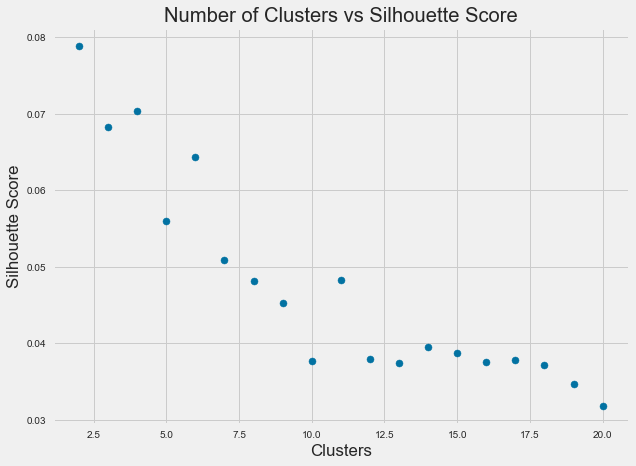

In [33]:
# Create lists to store clusters
clusters = []
inertia_vals = []

# Create clusters
for k in (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20):
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(X)
    
    # Add model to list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
# Create an empty dataframe for silhouette counts
sil_df = pd.DataFrame(columns=['Clusters', 'Silhouette Score'])
# Append sil_df with silhouette scores
for c in (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18):
    s = silhouette_score(X,clusters[c].predict(X),metric='euclidean')
    clus = clusters[c].n_clusters
    sil_df = sil_df.append({'Clusters' : clus, 'Silhouette Score' : s}, ignore_index=True)
# Create a scatter plot of Clusters vs Silhouette Score
fig=plt.figure()
ax=fig.add_axes([0, 0, 1, 1])
ax.scatter(sil_df['Clusters'], sil_df['Silhouette Score'], color='b')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Number of Clusters vs Silhouette Score')
plt.show()

## Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.


- ### The optimal number of clusters is 2 as it has the highest silhouette score

## Fit a K-means model to the data with the optimal number of clusters chosen in part (4).


In [34]:
k_means_model = KMeans(n_clusters=2, random_state=7)
k_means_model.fit(X)

KMeans(n_clusters=2, random_state=7)

In [35]:
label = k_means_model.fit_predict(X)

## Fit a PCA transformation with two features to the scaled data.


In [45]:
# Create a pca with 2 components
pca = PCA(n_components=2)

# Fit the PCA
als_pca = pca.fit_transform(X)
# Create a dataframe
als_pca_df = pd.DataFrame(data=als_pca, columns = ['PC 1', 'PC 2'])
# Add the cluster label to the dataframe
als_pca_df['Cluster'] = label
# View the dataframe
als_pca_df

,PC 1,PC 2,Cluster
0,-1.426717,-2.318425,0
1,-1.440247,-4.871998,0
2,1.617842,-0.428095,1
3,-1.919958,2.095952,0
4,0.297689,0.167373,1
...,...,...,...
2218,-4.477605,1.200488,0
2219,-0.398966,-1.877314,0
2220,-0.432883,4.245829,0
2221,-0.330783,3.317258,0


## Make a scatterplot the PCA transformed data coloring each point by its cluster value.


In [37]:
# Filter out clusters
als_cluster0 = als_pca_df.loc[als_pca_df['Cluster'] == 0]
als_cluster1 = als_pca_df.loc[als_pca_df['Cluster'] == 1]
als_cluster0

,PC 1,PC 2,Cluster
0,-1.426750,-2.318491,0
1,-1.440244,-4.871415,0
3,-1.919988,2.096074,0
5,-4.528940,-1.298245,0
8,-2.534987,2.298744,0
...,...,...,...
2217,-2.865582,2.049019,0
2218,-4.477612,1.200724,0
2219,-0.398950,-1.876134,0
2220,-0.432879,4.244189,0


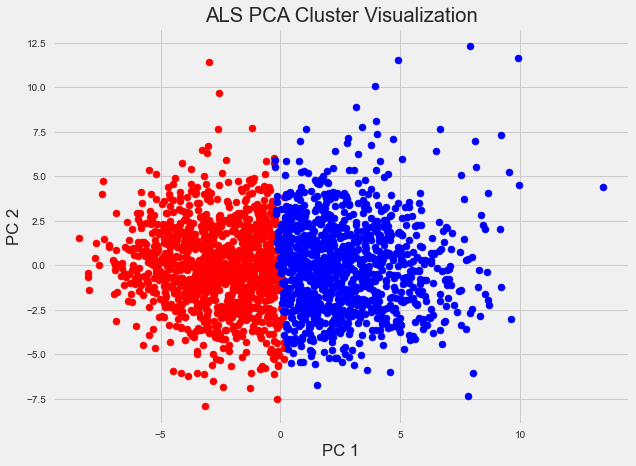

In [38]:
# Create a scatter plot of Clusters vs Silhouette Score
fig=plt.figure()
ax=fig.add_axes([0, 0, 1, 1])
ax.scatter(als_cluster0['PC 1'] , als_cluster0['PC 2'] , color = 'red')
ax.scatter(als_cluster1['PC 1'] , als_cluster1['PC 2'] , color = 'blue')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('ALS PCA Cluster Visualization')
plt.show()

## Summarize your results and make a conclusion.

- ### Applying kmeans clustering and PCA we can see after that two different and distinct groups are identified. If we use the visualization from above we can see that there is not a datapoints that is out of place from the groupings.